### HR Analytics - how likely is it that an employee will leave


In [1]:
# loading data sets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('C:/Users/omjee/Documents/Data Science/Vidhya Analytics/Janata Hack_HR Analytics/train_jqd04QH.csv')
test = pd.read_csv('C:/Users/omjee/Documents/Data Science/Vidhya Analytics/Janata Hack_HR Analytics/test_KaymcHn.csv')

In [2]:
# combine train and test 
whole = train.append(test)
whole.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0.0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0.0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0.0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0.0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1.0


In [3]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             33380 non-null  int64  
 1   city                    33380 non-null  object 
 2   city_development_index  33380 non-null  float64
 3   gender                  25894 non-null  object 
 4   relevent_experience     33380 non-null  object 
 5   enrolled_university     32759 non-null  object 
 6   education_level         32528 non-null  object 
 7   major_discipline        28149 non-null  object 
 8   experience              33277 non-null  object 
 9   company_size            24550 non-null  object 
 10  company_type            24011 non-null  object 
 11  last_new_job            32709 non-null  object 
 12  training_hours          33380 non-null  int64  
 13  target                  18359 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# Proportion of data missing in each column
whole.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

### Data cleaning, handling of missing value, data analysis 

In [5]:
whole['training_hours'].describe()

count    33380.000000
mean        65.565638
std         60.363572
min          1.000000
25%         23.000000
50%         47.000000
75%         89.000000
max        336.000000
Name: training_hours, dtype: float64

In [6]:
# log Transformation of column 'training hours'
whole['training_hours'] = np.log(whole['training_hours'])
whole['training_hours'].describe()

count    33380.000000
mean         3.759840
std          0.995878
min          0.000000
25%          3.135494
50%          3.850148
75%          4.488636
max          5.817111
Name: training_hours, dtype: float64

In [7]:
whole['last_new_job'].value_counts()

1        13813
>4        6023
2         5133
never     3943
3         1922
4         1875
Name: last_new_job, dtype: int64

In [8]:
whole['last_new_job'].fillna(value='-1', inplace=True)        # filling missing values
whole['last_new_job'] = whole['last_new_job'].replace('never', '0')
whole['last_new_job'] = whole['last_new_job'].replace('>4', '5')
whole['last_new_job'].value_counts()

1     13813
5      6023
2      5133
0      3943
3      1922
4      1875
-1      671
Name: last_new_job, dtype: int64

In [9]:
whole['company_type'].value_counts()

Pvt Ltd                18114
Funded Startup          1880
Public Sector           1792
Early Stage Startup     1029
NGO                      973
Other                    223
Name: company_type, dtype: int64

In [10]:
whole['company_type'].fillna(value='unknown', inplace=True)      # filling missing values
whole['company_type'].value_counts()

Pvt Ltd                18114
unknown                 9369
Funded Startup          1880
Public Sector           1792
Early Stage Startup     1029
NGO                      973
Other                    223
Name: company_type, dtype: int64

In [11]:
whole['company_size'].value_counts()

50-99        5697
100-500      4845
10000+       3666
10/49        2664
1000-4999    2513
<10          2464
500-999      1639
5000-9999    1062
Name: company_size, dtype: int64

In [12]:
whole['company_size'].fillna(value='unknown', inplace=True)        # filling missing values
whole['company_size'] = whole['company_size'].replace('10/49', '10-49')    # replacing
whole['company_size'].value_counts()

unknown      8830
50-99        5697
100-500      4845
10000+       3666
10-49        2664
1000-4999    2513
<10          2464
500-999      1639
5000-9999    1062
Name: company_size, dtype: int64

In [13]:
whole['experience'].fillna(value='-1', inplace=True)          # filling missing values
print(whole['experience'].value_counts())
print('No. of entries:', len(whole['experience']))
#whole.groupby('experience').count()

>20    6150
5      2400
4      2240
3      2166
6      2039
7      1779
2      1756
10     1753
9      1722
8      1423
15     1244
11     1190
14     1080
16      964
12      905
1       818
<1      782
13      763
17      659
19      590
18      533
20      321
-1      103
Name: experience, dtype: int64
No. of entries: 33380


In [14]:
whole['experience'] = whole['experience'].replace('<1', '0')
whole['experience'] = whole['experience'].replace('>20', '21')
whole['experience'] = whole['experience'].astype('int')

In [15]:
#whole['experience'].value_counts().index
# sum(whole['experience'].value_counts())

#### Sorting values into bins

In [16]:
bins = [-1, 0, 3, 6, 9, 12, 15, 18, 22]
labels = ['unknown', 'exp_level1', 'exp_level2', 'exp_level3', 'exp_level4', 'exp_level5', 'exp_level6', 'exp_level7']
whole['experience'] = pd.cut(whole['experience'], bins=bins, labels=labels, right=False)
print(whole['experience'].value_counts())
#print(sum(whole['experience'].value_counts()))

exp_level7    7594
exp_level2    6806
exp_level3    5241
exp_level4    4665
exp_level1    3356
exp_level6    2867
exp_level5    2748
unknown        103
Name: experience, dtype: int64


In [17]:
#whole['experience'].isnull().sum()
#whole['experience'].dtypes

In [18]:
whole['major_discipline'].fillna('unknown', inplace=True)     # filling missing values
whole['major_discipline'].value_counts()

STEM               24855
unknown             5231
Humanities          1212
Other                678
Business Degree      585
Arts                 432
No Major             387
Name: major_discipline, dtype: int64

In [19]:
whole['education_level'].fillna(value='unknown', inplace=True)      # filling missing values
#whole['education_level'].value_counts()

In [20]:
whole['city'].value_counts().head(10)

city_103    7852
city_21     3022
city_16     2928
city_114    2706
city_160    1531
city_136    1088
city_67      821
city_75      598
city_102     573
city_104     555
Name: city, dtype: int64

In [21]:
whole['city_development_index'].describe()

count    33380.000000
mean         0.846934
std          0.109972
min          0.448000
25%          0.794000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [22]:
whole['gender'].fillna(value='unknown', inplace=True)         # filling missing values
whole['gender'].value_counts()

Male       23462
unknown     7486
Female      2085
Other        347
Name: gender, dtype: int64

In [23]:
whole['relevent_experience'] = whole['relevent_experience'].replace('Has relevent experience', 'has_re')
whole['relevent_experience'] = whole['relevent_experience'].replace('No relevent experience', 'no_re')
print(whole['relevent_experience'].value_counts())

has_re    24698
no_re      8682
Name: relevent_experience, dtype: int64


In [24]:
whole['enrolled_university'].fillna(value='unknown', inplace=True)       # filling missing values
whole['enrolled_university'].value_counts()

no_enrollment       24887
Full time course     5752
Part time course     2120
unknown               621
Name: enrolled_university, dtype: int64

In [25]:
# Label encoding of 'city'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
whole['city'] = le.fit_transform(whole['city'])

In [26]:
clean_whole = whole.copy()
clean_whole

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,Male,has_re,no_enrollment,Graduate,STEM,exp_level2,100-500,Pvt Ltd,1,4.663439,0.0
1,29166,112,0.923,Male,has_re,no_enrollment,Graduate,STEM,exp_level5,<10,Funded Startup,1,4.234107,0.0
2,46,48,0.910,unknown,has_re,no_enrollment,Graduate,STEM,exp_level3,50-99,Public Sector,2,1.386294,0.0
3,18527,93,0.666,Male,has_re,no_enrollment,Graduate,STEM,exp_level5,50-99,Pvt Ltd,1,3.258097,0.0
4,21751,2,0.887,unknown,no_re,no_enrollment,Masters,STEM,exp_level3,unknown,unknown,2,4.477337,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,83,0.762,unknown,has_re,no_enrollment,Masters,STEM,exp_level7,500-999,Pvt Ltd,5,4.219508,NaN
15017,14612,64,0.624,Male,has_re,Full time course,Masters,STEM,exp_level2,1000-4999,Pvt Ltd,1,5.768321,NaN
15018,33346,48,0.910,Male,has_re,no_enrollment,High School,unknown,exp_level4,1000-4999,Pvt Ltd,4,2.564949,NaN
15019,14506,93,0.666,unknown,no_re,Full time course,Graduate,STEM,exp_level2,unknown,unknown,1,3.637586,NaN


In [27]:
clean_train = clean_whole[clean_whole['target'].isnull() !=True].drop(['enrollee_id'], axis=1)
#clean_train.head()

In [28]:
clean_test = clean_whole[clean_whole['target'].isnull() ==True].drop(['enrollee_id', 'target'], axis=1)
clean_test

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,73,0.448,unknown,no_re,Full time course,Graduate,STEM,exp_level1,1000-4999,Public Sector,-1,2.708050
1,70,0.939,Male,no_re,no_enrollment,Graduate,STEM,exp_level7,50-99,Pvt Ltd,1,4.543295
2,5,0.920,Male,no_re,Full time course,Graduate,STEM,exp_level2,unknown,unknown,1,2.833213
3,6,0.924,Male,no_re,no_enrollment,Phd,STEM,exp_level7,50-99,Pvt Ltd,2,4.330733
4,105,0.830,Male,has_re,no_enrollment,Graduate,STEM,exp_level3,<10,Pvt Ltd,2,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...
15016,83,0.762,unknown,has_re,no_enrollment,Masters,STEM,exp_level7,500-999,Pvt Ltd,5,4.219508
15017,64,0.624,Male,has_re,Full time course,Masters,STEM,exp_level2,1000-4999,Pvt Ltd,1,5.768321
15018,48,0.910,Male,has_re,no_enrollment,High School,unknown,exp_level4,1000-4999,Pvt Ltd,4,2.564949
15019,93,0.666,unknown,no_re,Full time course,Graduate,STEM,exp_level2,unknown,unknown,1,3.637586


In [29]:
clean_train.shape, clean_test.shape

((18359, 13), (15021, 12))

### Visualisation to understand variables affecting output

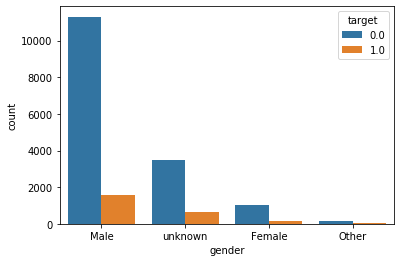

In [30]:
sns.countplot(x='gender', hue='target', data=clean_train)

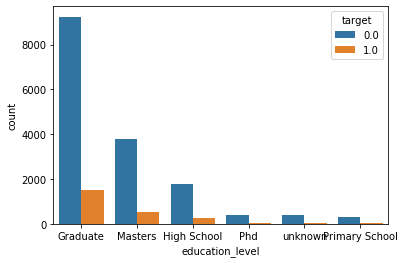

In [31]:
sns.countplot(x='education_level', hue='target', data=clean_train)

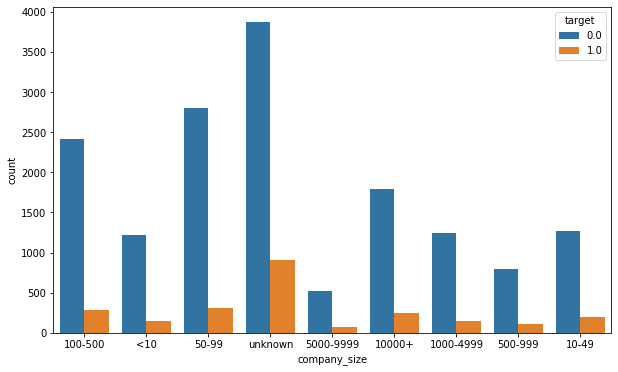

In [32]:
figure = plt.figure(figsize=(10, 6))
sns.countplot(x='company_size', hue='target', data=clean_train)

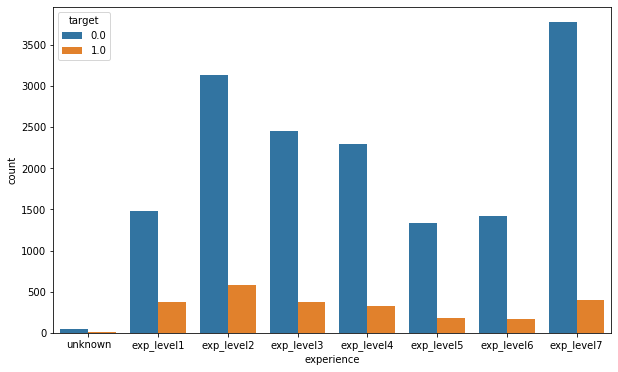

In [33]:
figure = plt.figure(figsize=(10, 6))
sns.countplot(x='experience', hue='target', data=clean_train)

### Train and Valid split

In [34]:
# Dataframe of only categorical variables
cat_cols = clean_train.select_dtypes(include=['object', 'category'])
cat_cols.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,has_re,no_enrollment,Graduate,STEM,exp_level2,100-500,Pvt Ltd,1
1,Male,has_re,no_enrollment,Graduate,STEM,exp_level5,<10,Funded Startup,1
2,unknown,has_re,no_enrollment,Graduate,STEM,exp_level3,50-99,Public Sector,2
3,Male,has_re,no_enrollment,Graduate,STEM,exp_level5,50-99,Pvt Ltd,1
4,unknown,no_re,no_enrollment,Masters,STEM,exp_level3,unknown,unknown,2


In [35]:
for col in cat_cols:
    clean_train = pd.concat([clean_train.drop(col, axis=1), pd.get_dummies(cat_cols[col], drop_first=1)], axis=1)   
clean_train.head()

,city,city_development_index,training_hours,target,Male,Other,unknown,no_re,Part time course,no_enrollment,...,Other,Public Sector,Pvt Ltd,unknown,0,1,2,3,4,5
0,41,0.689,4.663439,0.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,112,0.923,4.234107,0.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,48,0.910,1.386294,0.0,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,93,0.666,3.258097,0.0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,2,0.887,4.477337,1.0,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [36]:
# Final test data set
cat_cols_test = clean_test.select_dtypes(include=['object', 'category'])
for col in cat_cols_test:
    clean_test = pd.concat([clean_test.drop(col, axis=1), pd.get_dummies(cat_cols_test[col], drop_first=True)], axis=1)
clean_test

,city,city_development_index,training_hours,Male,Other,unknown,no_re,Part time course,no_enrollment,unknown,...,Other,Public Sector,Pvt Ltd,unknown,0,1,2,3,4,5
0,73,0.448,2.708050,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,70,0.939,4.543295,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,5,0.920,2.833213,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,6,0.924,4.330733,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,105,0.830,4.174387,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,83,0.762,4.219508,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
15017,64,0.624,5.768321,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
15018,48,0.910,2.564949,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
15019,93,0.666,3.637586,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [37]:
x = clean_train.drop('target', axis=1)
y = clean_train['target']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=10)


In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred = log_reg.predict(x_valid)

In [41]:
# Model Evaluation
from sklearn.metrics import accuracy_score 
print('Accuracy_score:', accuracy_score(y_valid, pred))

Accuracy_score: 0.869281045751634


In [42]:
# Prediction on test dataset
pred_test = log_reg.predict(clean_test)
 
pred_test_df = pd.DataFrame(pred_test, index=test['enrollee_id'], columns=['target'])
pred_test_df['target'].value_counts()

0.0    15012
1.0        9
Name: target, dtype: int64